# Estrutura a termo - Curva de juros brasileira


Gerar a estrutura a termo da curva de juros brasileira, com base em dados extraídos do site [Investing](https://www.investing.com/)

## 1 - Importando Bibliotecas

In [ ]:
# Por algum motivo, essa biblioteca precisa ser instalada duas vezes. Após 
# rodar e receber mensagem de erro ao final da instalação, clicar em 
# "Restart Environment" e rodar a célula de novo. Deve funcionar

!pip install investpy
import investpy as inv

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns; sns.set()
from datetime import date, timedelta
import plotly.graph_objects as go

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.font_manager as font_manager
matplotlib.rcParams['figure.figsize'] = (16,8)
labelfont = {'fontname':'Trebuchet MS', 'fontsize':'20'}

## 2 - Coletando Dados da Curva de Juros

In [3]:
# Importa Lista de Vencimentos
Juros_BR=inv.get_bonds_list(country='brazil')

In [4]:
# Cria dataframe vazio
Curva_Termo = pd.DataFrame()

# Importa vencimentos do dia anterior
TODAY = date.today().strftime("%d/%m/%Y")
YESTERDAY = (date.today() - timedelta(days=1)).strftime("%d/%m/%Y")
DAY_BEFORE = (date.today() - timedelta(days=2)).strftime("%d/%m/%Y")

for Vencimentos in Juros_BR:
  Curva_Termo[Vencimentos] = inv.get_bond_historical_data(Vencimentos, from_date=DAY_BEFORE, to_date=YESTERDAY)['Close']

Curva_Termo.index = pd.to_datetime(Curva_Termo.index)

findfont: Font family ['Trebuchet MS'] not found. Falling back to DejaVu Sans.


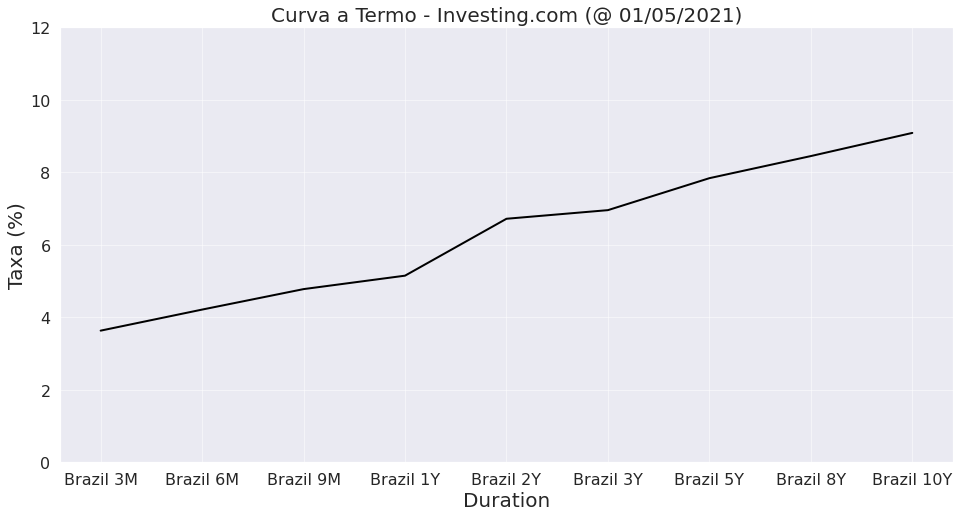

In [5]:
# Exibindo Resultado
Figure_1 = plt.figure()
plt.title('Curva a Termo - Investing.com (@ '+TODAY+')',**labelfont)
plt.grid(axis='both', alpha=0.5)
plt.plot(Juros_BR, Curva_Termo.loc[YESTERDAY],linewidth=2, color='black')
plt.xlabel("Duration",**labelfont)
plt.ylabel("Taxa (%)",**labelfont)
plt.ylim([0,12])
plt.tick_params(axis="y", labelsize=16)
plt.tick_params(axis="x", labelsize=16)
plt.show()

## 3 - Curva a Termo - Variação Mensal

In [6]:
# Cria dataframe vazio
Curva_Termo_Mensal = pd.DataFrame()

# Importa vencimentos Em Datas Distindas - nem todos os vencimentos estão
# disponíveis em todas as datas
DATA_INICIAL = '01/01/2000'
DATA_FINAL = date.today().strftime("%d/%m/%Y")

for Vencimentos in Juros_BR:
  Curva_Termo_Mensal[Vencimentos] = inv.get_bond_historical_data(Vencimentos, from_date=DATA_INICIAL, to_date=DATA_FINAL, interval='Monthly')['Close']

Curva_Termo_Mensal.index = pd.to_datetime(Curva_Termo_Mensal.index)

In [7]:
# Criando Figura Interativa

Fig = go.Figure()

# Loops em todas as datas
for ii in Curva_Termo_Mensal.index:
  Fig.add_trace(
      go.Scatter(
          x=Juros_BR,                     # Vencimentos
          y=Curva_Termo_Mensal.loc[ii],   # Taxas
          mode='lines',
          name=str(ii),                   
          visible=False,
          line=dict(color="black", width=2)
          )
      )

# Primeiro plot é Visível
Fig.data[0].visible=True

# Adicionando "Sliders"

Steps = []

# Um Passo para cada data
for ii in range(len(Fig.data)):
  step=dict(
      method='restyle',
      args=['visible', [False]*len(Fig.data)],
      label=Fig.data[ii]['name'][:7]
  )
  step['args'][1][ii] = True
  Steps.append(step)


sliders = [dict(
    active=0,
    currentvalue={'prefix':"Mês "},
    steps=Steps,
    pad={"t":50},
    font={'size': 16, "family":"Trebuchet MS"}
)]

Fig.update_layout(
    sliders=sliders,
    yaxis=dict(range=[0,20]),
    title='Curva a Termo - Investing.com',
    title_font_family="Trebuchet MS",
    title_font_size=20,
    )

Fig.update_xaxes(
    title_text='Duration',
    title_font_family="Trebuchet MS",
    title_font_size=20,
    tickfont_family="Trebuchet MS",
    tickfont_size=18
    )

Fig.update_yaxes(
    title_text='Taxa (%)',
    title_font_family="Trebuchet MS",
    title_font_size=20,
    tickfont_family="Trebuchet MS",
    tickfont_size=18
    )

Fig.show()